In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
path = './data/Table_S1.txt'
df = pd.read_csv(path, sep='\t', low_memory=False)

In [5]:
id_0 = df[df['donor_unique_id'] == df.donor_unique_id.unique()[0]]

In [16]:
[print(i, col) for i, col in enumerate(id_0.columns)]

0 donor_unique_id
1 Chr
2 Start
3 End
4 Intrchr. SVs
5 Total SVs (intrachr. + transl.)
6 SVs in sample
7 Nb. DEL
8 Nb. DUP
9 Nb. h2hINV
10 Nb. t2tINV
11 Nb. TRA
12 P fragment joints
13 P chr breakpoint enrichment
14 Nb. CN segments
15 P exponential dist
16 P exponential dist. cluster
17 CN segments
18 Nb. oscillating CN
19 Nb. oscillaring CN 3 states
20 CN segments chr.
21 Nb. oscillating chr.
22 Nb. oscillating chr 3 states
23 PGA sample
24 PGA chr.
25 PGNA chr.
26 clustered APOBEC mutations (<2.5 Kb)
27 CN mode 1
28 CN mode 2
29 wgs_exclusion_white_gray
30 dcc_project_code
31 Other interacting chromothripsis regions
32 FDR fragment joints intrachr. SVs and TRA
33 FDR chr breakpoint enrichment
34 FDR exponential dist.
35 FDR exponential dist. cluster
36 FDR fragment joints intrachr. SVs
37 chromo
38 chromo_label
39 tissue.x
40 donor_idx
41 tissue2
42 purity
43 ploidy
44 histo
45 type_chromothripsis
46 Nb. breakpoints in chromosome
47 Fraction SVs in chromothripsis
48 TP53_mutations
49

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

# First, we explore the frequency with which specific chromosomes appear in chromothripsis. We observe a strong inverse correlation between chromosome length (in base pairs) and chromosome frequency in chromothripsis

In [61]:
chr_count = dict()

# create two series for each chromosome and associated SV counts
sv_count = df.iloc[:,5] 
chr_number = df.iloc[:,1]

In [74]:
for i in range(len(sv_count)):
    if sv_count[i] == 0:
        if chr_number[i] in chr_count:
            chr_count[chr_number[i]] += 1
        else:
            chr_count[chr_number[i]] = 1

In [97]:
nums = [str(i) for i in range(1, 23)]
nums.append('X')

chr_count_sorted = dict()

for i in nums:
    chr_count_sorted[i] = chr_count[i]

Text(0.5, 1.0, 'Chromosome frequency in Chromothripsis')

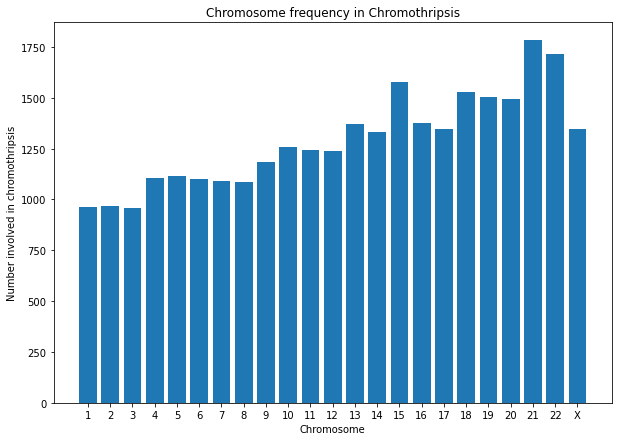

In [98]:
plt.figure(figsize=(10,7))
plt.bar(range(len(chr_count_sorted)), list(chr_count_sorted.values()), align='center')
plt.xticks(range(len(chr_count_sorted)), list(chr_count_sorted.keys()))
plt.xlabel('Chromosome')
plt.ylabel('Number involved in chromothripsis')
plt.title('Chromosome frequency in Chromothripsis')

In [136]:
length_url = 'http://www.insilicase.com/Web/Chromlen.aspx'
length_df = pd.read_html(length_url)
length_df = length_df[32].loc[:22]

In [137]:
length_df

,Chromosome,Length (bp),Centromere (bp),Percent of total Male,Percent of total Female
0,1,247249719,124200000.0,8.31,8.18
1,2,242951149,93400000.0,8.17,8.04
2,3,199501827,91700000.0,6.71,8.60
3,4,191273063,50900000.0,6.43,6.33
4,5,180857866,47700000.0,6.08,5.98
5,6,170899992,60500000.0,5.74,5.65
6,7,158821424,58900000.0,5.34,5.25
7,8,146274826,45200000.0,4.92,4.84
8,9,140273252,50600000.0,4.72,4.64
9,10,135374737,40300000.0,4.55,4.48


Text(0.5, 1.0, 'Chromosomes by length')

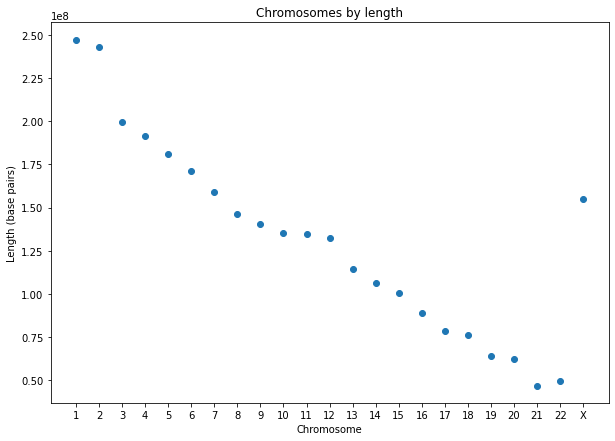

In [150]:
plt.figure(figsize=(10,7))
plt.scatter([x for x in range(len(length_df))], length_df[length_df.columns[1]])
plt.xticks(range(len(length_df)), length_df[length_df.columns[0]].values)
plt.xlabel('Chromosome')
plt.ylabel('Length (base pairs)')
plt.title('Chromosomes by length')

Text(0.5, 1.0, 'Chromosomes length vs. chromothripsis frequency')

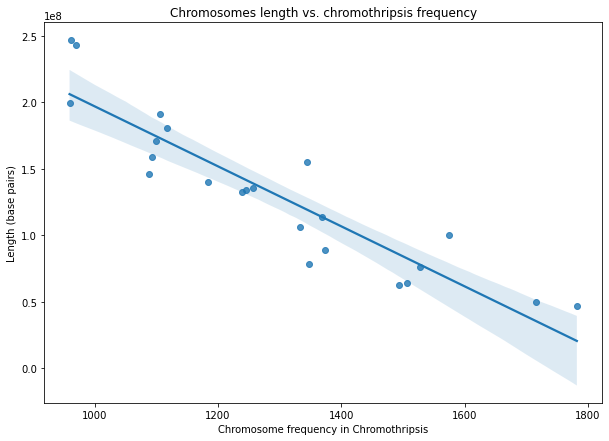

In [161]:
# Plot chromosome length vs. chromothripsis frequency
plt.figure(figsize=(10,7))
sns.regplot(x=list(chr_count_sorted.values()), y=length_df[length_df.columns[1]])
plt.xlabel('Chromosome frequency in Chromothripsis')
plt.ylabel('Length (base pairs)')
plt.title('Chromosomes length vs. chromothripsis frequency')

# Here, we observed the frequency of specific chromosome combinations in chromothripsis

In [162]:
chr_combos = list()

In [169]:
ids = df.donor_unique_id.unique()

array(['BLCA-US::096b4f32-10c1-4737-a0dd-cae04c54ee33',
       'BLCA-US::178b28cd-99c3-48dc-8d09-1ef71b4cee80',
       'BLCA-US::1e308b12-0590-4dae-94d0-a539fcf25df7', ...,
       'UCEC-US::f8ac5fd2-11f2-4b3a-a3a6-ff1a6d8e1cae',
       'UCEC-US::fba80122-d8b2-4d8d-a032-9767e8160f9f',
       'UCEC-US::ffaa98a0-2b69-46dc-aee5-c5c3f2abbc38'], dtype=object)

In [179]:
id_0 = df[df[df.columns[0]] == ids[0]]

for chrom in id_0.iloc[:,5].values:
    print(chrom)


3
4
12
2
14
6
2
19
3
1
1
2
8
0
0
1
2
3
0
1
1
3
0


In [164]:
for id in df.donor_unique_id.unique():
    print(id)

BLCA-US::096b4f32-10c1-4737-a0dd-cae04c54ee33
BLCA-US::178b28cd-99c3-48dc-8d09-1ef71b4cee80
BLCA-US::1e308b12-0590-4dae-94d0-a539fcf25df7
BLCA-US::24f21425-b001-4986-aedf-5b4dd851c6ad
BLCA-US::3ed614e7-f356-4d87-985b-d3bbbae3bb40
BLCA-US::419deaac-ea45-4bdd-9fa0-b5cd8429b44f
BLCA-US::493a4ff2-37a5-4b79-928d-83dbfe534556
BLCA-US::556fcbc8-172a-4af1-8822-ae036e8d68e8
BLCA-US::56d8a1b8-1268-4362-a7f1-77b76fbf1b59
BLCA-US::5d54c742-5a8e-4c40-8d62-95e75e210ab8
BLCA-US::797a71ee-372d-41e5-aeee-5ab3c4661110
BLCA-US::7fee9d6f-c0ea-43c2-89c2-66d965a077a8
BLCA-US::8c1dd7f7-b74a-4fa2-b6a7-86f0348d2567
BLCA-US::904a8757-e0c5-41ef-b583-c8f170caaac1
BLCA-US::932bcdd4-5145-49e8-9a95-8a546396f572
BLCA-US::9c274536-3ca1-4f0e-93a8-1688074d862f
BLCA-US::a658becf-3934-49f2-9e74-291dca61d4bb
BLCA-US::ca554128-da9d-4f37-9560-ca083509e01d
BLCA-US::cb664eef-be6f-44ef-aa90-6f6da0e6440a
BLCA-US::cce62116-3dcd-400d-ada0-9839ca02466e
BLCA-US::cede5274-279d-4021-8aca-5ecc4bf94d66
BLCA-US::f48937ed-e294-41f0-8872-7

PACA-CA::PCSI_0283
PACA-CA::PCSI_0284
PACA-CA::PCSI_0285
PACA-CA::PCSI_0287
PACA-CA::PCSI_0290
PACA-CA::PCSI_0292
PACA-CA::PCSI_0294
PACA-CA::PCSI_0297
PACA-CA::PCSI_0300
PACA-CA::PCSI_0301
PACA-CA::PCSI_0302
PACA-CA::PCSI_0303
PACA-CA::PCSI_0305
PACA-CA::PCSI_0307
PACA-CA::PCSI_0310
PACA-CA::PCSI_0311
PACA-CA::PCSI_0312
PACA-CA::PCSI_0324
PACA-CA::PCSI_0325
PACA-CA::PCSI_0326
PACA-CA::PCSI_0328
PACA-CA::PCSI_0329
PACA-CA::PCSI_0334
PACA-CA::PCSI_0337
PACA-CA::PCSI_0338
PACA-CA::PCSI_0340
PACA-CA::PCSI_0341
PACA-CA::PCSI_0345
PACA-CA::PCSI_0347
PACA-CA::PCSI_0348
PACA-CA::PCSI_0350
PACA-CA::PCSI_0351
PACA-CA::PCSI_0352
PACA-CA::PCSI_0353
PACA-CA::PCSI_0354
PACA-CA::PCSI_0355
PACA-CA::PCSI_0356
PACA-CA::PCSI_0375
PACA-CA::PCSI_0392
PACA-CA::PCSI_0403
PACA-CA::PCSI_0404
PACA-CA::PCSI_0413
PACA-CA::PCSI_0450
PACA-CA::PCSI_0451
PACA-CA::PCSI_0453
PACA-CA::PCSI_0454
PACA-CA::PCSI_0456
PACA-CA::PCSI_0457
PACA-CA::PCSI_0458
PACA-CA::PCSI_0463
PACA-CA::PCSI_0465
PACA-CA::PCSI_0468
PACA-CA::PCS